# Test running function with timer

In [1]:
def long_function_call():
    while True:
        pass

In [18]:
import signal
import time

runtimes = []

def signal_handler(signum, frame):
    raise Exception("Timed out!")

signal.signal(signal.SIGALRM, signal_handler)

def test_timer_interrupt():
    signal.setitimer(signal.ITIMER_REAL, 0.097)

    try:
        start = time.perf_counter_ns()
        long_function_call()
    except Exception:
        runtime = time.perf_counter_ns() - start
        runtimes.append(runtime)
        
for _ in range(100):
    test_timer_interrupt()

(array([16.,  9.,  3.,  5.,  2.,  2.,  6.,  2.,  2.,  2.,  2.,  1.,  1.,
         0.,  1.,  0.,  0.,  1.,  0.,  2.,  3.,  1.,  1.,  5.,  3.,  3.,
         3.,  5.,  4.,  4.,  0.,  3.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([97.004243  , 97.00498479, 97.00572658, 97.00646837, 97.00721016,
        97.00795195, 97.00869374, 97.00943553, 97.01017732, 97.01091911,
        97.0116609 , 97.01240269, 97.01314448, 97.01388627, 97.01462806,
        97.01536985, 97.01611164, 97.01685343, 97.01759522, 97.01833701,
        97.0190788 , 97.01982059, 97.02056238, 97.02130417, 97.02204596,
        97.02278775, 97.02352954, 97.02427133, 97.02501312, 97.025754

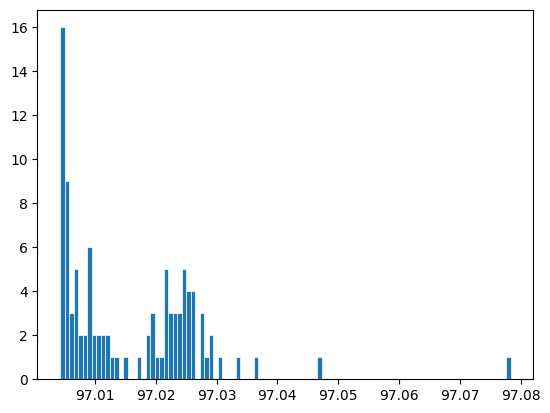

In [19]:
import matplotlib.pyplot as plt

# plot runtimes
runtimes_ms = [rt/1_000_000 for rt in runtimes]
fig, ax = plt.subplots()
ax.hist(runtimes_ms, bins=100, linewidth=0.5, edgecolor="white")